# Repaso


## Inversa de una matriz

In [1]:
import numpy as np

# Definir una matriz
A = np.array([[2, -1], [1, 3]])  # Matriz 2x2

# Calcular la inversa de la matriz A
A_inv = np.linalg.inv(A)  # Inversa de la matriz A

# Imprimir la matriz inversa
print("Inversa de A:")
print(A_inv)

Inversa de A:
[[ 0.42857143  0.14285714]
 [-0.14285714  0.28571429]]


## Producto de matrices y vectores

In [2]:
A[0]  # Primera fila de A

array([ 2, -1])

In [3]:
A[1]  # Segunda fila de A

array([1, 3])

In [4]:
print("Producto de matrices y vectores:")
print(np.dot(A[0], A[1]))

Producto de matrices y vectores:
-1


# Eigenvalores e eigenvectores

Los eigenvectores y eigenvalores son conceptos fundamentales en el álgebra lineal y tienen importantes aplicaciones en diversas áreas, incluyendo el machine learning. Aquí te explico qué son y cómo se representan en Python:

## Eigenvector
Un eigenvector es un vector no nulo que, cuando se multiplica por una matriz, solo cambia en escala (es decir, se estira o se contrae), sin cambiar su dirección.

En otras palabras, si tienes una matriz $A$ y un eigenvector $v$, entonces $$A \cdot v = \lambda \cdot v,$$ donde $\lambda$ es el eigenvalor correspondiente. Los eigenvectores son importantes porque representan direcciones especiales dentro de una transformación lineal representada por una matriz.

## Eigenvalor
El eigenvalor ($\lambda$) es un número escalar que corresponde a un eigenvector y nos dice cuánto se estira o contrae el eigenvector cuando se aplica la matriz. Cada eigenvector tiene su propio eigenvalor.

Los eigenvalores son útiles para comprender la magnitud del efecto de la matriz en la dirección representada por el eigenvector.

In [5]:
import numpy as np

# Definir una matriz
A = np.array([[2, 1], [5, 2]])

# Calcular eigenvectores y eigenvalores
evalues, evectors = np.linalg.eig(A)

# Imprimir los eigenvalores
print("Eigenvalores:", evalues)

# Imprimir los eigenvectores
print("Eigenvectores:", evectors)

Eigenvalores: [ 4.23606798 -0.23606798]
Eigenvectores: [[ 0.40824829 -0.40824829]
 [ 0.91287093  0.91287093]]


In [6]:
print("Producto escalar de los eigenvectores:")
print(np.dot(evectors[0], evectors[1]))

Producto escalar de los eigenvectores:
0.0


# PCA

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Cargar el conjunto de datos Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Eigenvectores como Componentes Principales
Cuando aplicas PCA a un conjunto de datos, el algoritmo busca los eigenvectores de la matriz de covarianza de los datos. Estos eigenvectores representan las direcciones principales a lo largo de las cuales los datos tienen la mayor variabilidad. En otras palabras, los eigenvectores son las componentes principales de los datos.

Para obtener los componentes principales primero es necesario obtener la matriz de covarianza. Para ello,

$$cov(X) = \dfrac{1}{n} \cdot (X - \mu)^T (X - \mu)$$

In [9]:
# Calcular la matriz de covarianza de forma manual
X_1 = X - np.mean(X, 0)  # Normalizar los datos
cov_matrix = 1 / X.shape[0] * np.matmul(X_1.T, X_1)  # Calcular la matriz de covarianza

# Imprimir la matriz de covarianza
print("Matriz de Covarianza:")
print(cov_matrix)

Matriz de Covarianza:
[[ 0.68112222 -0.04215111  1.26582     0.51282889]
 [-0.04215111  0.18871289 -0.32745867 -0.12082844]
 [ 1.26582    -0.32745867  3.09550267  1.286972  ]
 [ 0.51282889 -0.12082844  1.286972    0.57713289]]


In [10]:
cov_matrix_alt = np.cov(
    X, rowvar=False
)  # Calcular la matriz de covarianza de forma automática
print("Matriz de Covarianza:")
print(cov_matrix_alt)

Matriz de Covarianza:
[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


In [11]:
evalues, evectors = np.linalg.eig(cov_matrix)  # Calcular eigenvectores y eigenvalores
print("Eigenvalores:")
print(evalues)
print("\nEigenvectores:")
print(evectors)

Eigenvalores:
[4.20005343 0.24105294 0.0776881  0.02367619]

Eigenvectores:
[[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


## Eigenvalores como Importancia de Componentes
Los eigenvalores correspondientes a los eigenvectores indican la importancia relativa de cada componente principal. Cuanto mayor sea el eigenvalor, más importante es la dirección principal correspondiente en términos de la variabilidad de los datos.

Los eigenvalores te dicen cuánta información se conserva cuando reduces la dimensionalidad del conjunto de datos.

In [12]:
print(evectors)

[[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


In [13]:
print(evalues)

[4.20005343 0.24105294 0.0776881  0.02367619]


In [14]:
# Ordenar los eigenvectores y eigenvalores de mayor a menor
evalues_index = np.argsort(evalues)[::-1]
evectors_sorted = evectors[:, evalues_index]
evalues_sorted = evalues[evalues_index]

print(evalues_sorted)

[4.20005343 0.24105294 0.0776881  0.02367619]


In [15]:
# Seleccionar los dos componentes principales
principal_components = evectors_sorted[:, :2]

print(principal_components)

[[ 0.36138659 -0.65658877]
 [-0.08452251 -0.73016143]
 [ 0.85667061  0.17337266]
 [ 0.3582892   0.07548102]]


In [16]:
# Proyectar los datos originales en el espacio definido por los componentes principales
X_transformed = np.dot(X, principal_components)

# Ahora X_transformed contiene los datos proyectados en un espacio bidimensional definido por los componentes principales.
print(X_transformed)

[[ 2.81823951 -5.64634982]
 [ 2.78822345 -5.14995135]
 [ 2.61337456 -5.18200315]
 [ 2.75702228 -5.0086536 ]
 [ 2.7736486  -5.65370709]
 [ 3.2215055  -6.06828303]
 [ 2.68182738 -5.23749119]
 [ 2.87622016 -5.49033754]
 [ 2.6159824  -4.74864082]
 [ 2.82960933 -5.21317833]
 [ 2.99541804 -5.97202148]
 [ 2.8896099  -5.34168252]
 [ 2.71625587 -5.09184058]
 [ 2.27856139 -4.81555799]
 [ 2.85761474 -6.50571721]
 [ 3.1163261  -6.66501491]
 [ 2.87883726 -6.13763209]
 [ 2.85406843 -5.63880172]
 [ 3.30254481 -6.19979162]
 [ 2.91437873 -5.84051289]
 [ 3.19210892 -5.71829851]
 [ 2.9586599  -5.75994864]
 [ 2.28642572 -5.46042065]
 [ 3.19963195 -5.42566143]
 [ 3.14661108 -5.28967072]
 [ 2.99569623 -5.1809357 ]
 [ 3.03354506 -5.45790407]
 [ 2.94004523 -5.69467143]
 [ 2.86283042 -5.63899256]
 [ 2.87037575 -5.12999135]
 [ 2.91496666 -5.12263409]
 [ 3.09243264 -5.73787684]
 [ 2.8535028  -6.1403164 ]
 [ 2.90362838 -6.42009834]
 [ 2.86543825 -5.20563023]
 [ 2.63612348 -5.39631705]
 [ 2.87712708 -5.9263226 ]
 

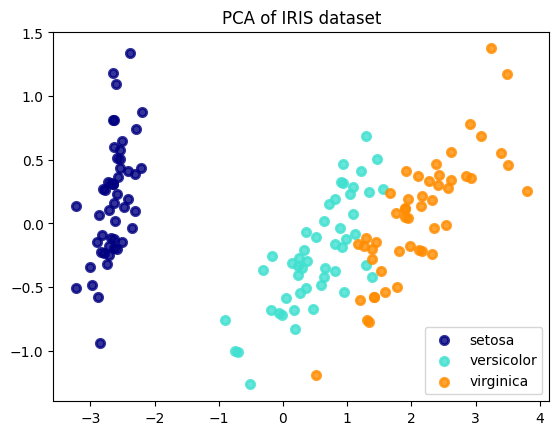

In [17]:
from sklearn.decomposition import PCA

# Aplicar PCA para reducción de dimensionalidad a 2 componentes principales
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)

# Visualizar los datos proyectados en el espacio de 2 dimensiones
plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")
plt.show()

# Aplicando PCA a un conjunto de datos
Principal Component Analysis (Análisis de Componentes Principales)

In [18]:
# @title Funciones auxiliares para visualización


def plot_MNIST_sample(X):
    """
    Plots 9 images in the MNIST dataset.

    Args:
       X (numpy array of floats) : Data matrix each column corresponds to a
                                   different random variable

    Returns:
      Nothing.

    """

    fig, ax = plt.subplots()
    k = 0
    for k1 in range(3):
        for k2 in range(3):
            k = k + 1
            plt.imshow(
                np.reshape(X[k, :], (28, 28)),
                extent=[(k1 + 1) * 28, k1 * 28, (k2 + 1) * 28, k2 * 28],
                vmin=0,
                vmax=255,
            )
    plt.xlim((3 * 28, 0))
    plt.ylim((3 * 28, 0))
    plt.tick_params(
        axis="both", which="both", bottom=False, top=False, labelbottom=False
    )
    plt.clim([0, 250])
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()


def plot_evalues(evals, xlimit=False):
    """
    Plots eigenvalues.

    Args:
       (numpy array of floats) : Vector of eigenvalues
       (boolean) : enable plt.show()
    Returns:
      Nothing.

    """

    plt.figure()
    plt.plot(np.arange(1, len(evals) + 1), evals, "o-k")
    plt.xlabel("Componente")
    plt.ylabel("Eigenvalor")
    plt.title("Gráfico de eivenvalores ordenados por peso")
    if xlimit:
        plt.xlim([0, 100])  # limit x-axis up to 100 for zooming
    plt.show()

El conjunto de datos MNIST consta de 70.000 imágenes de dígitos manuscritos individuales. Cada imagen es una imagen en escala de grises de 28x28 píxeles. Para mayor comodidad, cada imagen de 28x28 píxeles suele descomponerse en un único vector de 784 (=28x28) elementos, de modo que todo el conjunto de datos se representa como una matriz de 70.000 x 784. Cada fila representa una imagen diferente, y cada columna representa un píxel diferente.


Introduzca la siguiente celda para cargar el conjunto de datos MNIST y trazar las nueve primeras imágenes. Puede tardar unos minutos en cargarse.

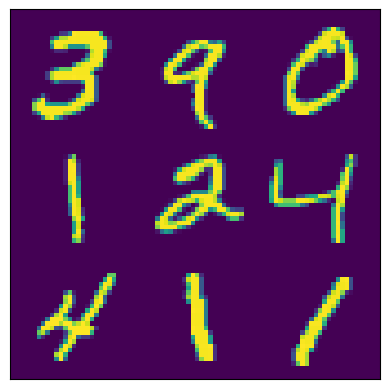

In [19]:
from sklearn.datasets import fetch_openml

# GET mnist data
mnist = fetch_openml(name="mnist_784", as_frame=False, parser="auto")
X = mnist.data

# Visualize
plot_MNIST_sample(X)

## Construcción de la función ``pca(X)``

En esta sección construiremos la función `pca(X)` que nos hará el análisis de componentes principales de la matriz $X$. Usaremos lo visto hasta el momento para construirla.

In [20]:
# @title Resumen de secciones anteriores


def get_sample_cov_matrix(X):
    """
    Returns the sample covariance matrix of data X.

    Args:
      X (numpy array of floats) : Data matrix each column corresponds to a
                                  different random variable

    Returns:
      (numpy array of floats)   : Covariance matrix
    """

    X = X - np.mean(X, 0)
    cov_matrix = 1 / X.shape[0] * np.matmul(X.T, X)
    return cov_matrix


def sort_evalues_descending(evalues, evectors):
    """
    Sorts eigenvalues and eigenvectors in decreasing order. Also aligns first two
    eigenvectors to be in first two quadrants (if 2D).

    Args:
      evalues (numpy array of floats)    :   Vector of eigenvalues
      evectors (numpy array of floats) :   Corresponding matrix of eigenvectors
                                           each column corresponds to a different
                                           eigenvalue

    Returns:
      (numpy array of floats)          : Vector of eigenvalues after sorting
      (numpy array of floats)          : Matrix of eigenvectors after sorting
    """

    index = np.flip(np.argsort(evalues))
    evalues = evalues[index]
    evectors = evectors[:, index]
    if evalues.shape[0] == 2:
        if (
            np.arccos(np.matmul(evectors[:, 0], 1 / np.sqrt(2) * np.array([1, 1])))
            > np.pi / 2
        ):
            evectors[:, 0] = -evectors[:, 0]
        if (
            np.arccos(np.matmul(evectors[:, 1], 1 / np.sqrt(2) * np.array([-1, 1])))
            > np.pi / 2
        ):
            evectors[:, 1] = -evectors[:, 1]

    return evalues, evectors


def change_of_basis(X, W):
    """
    Projects data onto a new basis.

    Args:
      X (numpy array of floats) : Data matrix each column corresponding to a
                                  different random variable
      W (numpy array of floats) : new orthonormal basis columns correspond to
                                  basis vectors

    Returns:
      (numpy array of floats)   : Data matrix expressed in new basis
    """

    Y = np.matmul(X, W)

    return Y

In [21]:
def pca(X):
    """
    Performs PCA on multivariate data. Eigenvalues are sorted in decreasing order

    Args:
       X (numpy array of floats) :   Data matrix each column corresponds to a
                                     different random variable

    Returns:
      (numpy array of floats)    : Data projected onto the new basis
      (numpy array of floats)    : Corresponding matrix of eigenvectors
      (numpy array of floats)    : Vector of eigenvalues

    """

    X = X - np.mean(X, 0)
    cov_matrix = get_sample_cov_matrix(X)
    evalues, evectors = np.linalg.eigh(cov_matrix)
    evalues, evectors = sort_evalues_descending(evalues, evectors)
    score = change_of_basis(X, evectors)

    return score, evectors, evalues

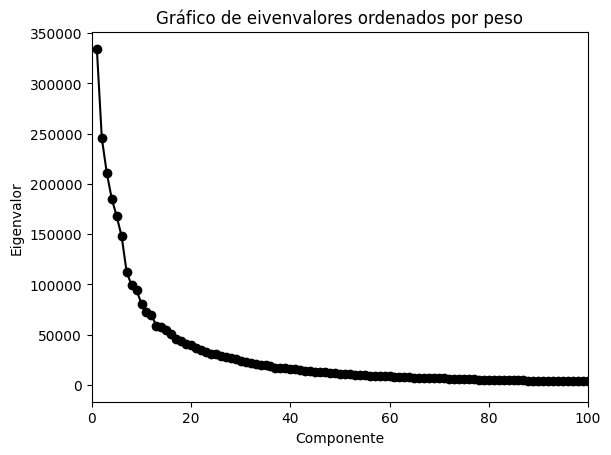

In [22]:
# Perform PCA
score, evectors, evalues = pca(X)

# Plot the eigenvalues
plot_evalues(evalues, xlimit=True)  # limit x-axis up to 100 for zooming

## Utilizando `pca` de `sklearn`

In [23]:
# @title Funciones auxiliares para visualización


def visualize_components(component1, component2, labels, show=True):
    """
    Plots a 2D representation of the data for visualization with categories
    labelled as different colors.

    Args:
      component1 (numpy array of floats) : Vector of component 1 scores
      component2 (numpy array of floats) : Vector of component 2 scores
      labels (numpy array of floats)     : Vector corresponding to categories of
                                           samples

    Returns:
      Nothing.

    """

    plt.figure()
    plt.scatter(x=component1, y=component2, c=labels, cmap="tab10")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.colorbar(ticks=range(10))
    plt.clim(-0.5, 9.5)
    if show:
        plt.show()

En este ejercicio, visualizaremos los primeros componentes del conjunto de datos MNIST para buscar evidencias de estructura en los datos. Pero en este tutorial, también estaremos interesados en la etiqueta de cada imagen (es decir, qué número es del 0 al 9). Comience ejecutando la siguiente celda para recargar el conjunto de datos MNIST (esto tarda unos segundos).

In [24]:
from sklearn.datasets import fetch_openml

# Get images
mnist = fetch_openml(name="mnist_784", as_frame=False, parser="auto")
X_all = mnist.data

# Get labels
labels_all = np.array([int(k) for k in mnist.target])

**Nota:** Guardamos el dataset completo `X_all` y las etiquetas como `labels_all`.

Para realizar el PCA, ahora utilizaremos el método implementado en `sklearn`. Ejecute la siguiente celda para establecer los parámetros de PCA - sólo nos fijaremos en los 2 componentes superiores porque vamos a visualizar los datos en 2D.

In [25]:
from sklearn.decomposition import PCA

# Initializes PCA
pca_model = PCA(n_components=2)

# Performs PCA
pca_model.fit(X_all)

PCA(n_components=2)

In [26]:
help(visualize_components)
help(pca_model.transform)

Help on function visualize_components in module __main__:

visualize_components(component1, component2, labels, show=True)
    Plots a 2D representation of the data for visualization with categories
    labelled as different colors.

    Args:
      component1 (numpy array of floats) : Vector of component 1 scores
      component2 (numpy array of floats) : Vector of component 2 scores
      labels (numpy array of floats)     : Vector corresponding to categories of
                                           samples

    Returns:
      Nothing.

Help on method transform in module sklearn.decomposition._base:

transform(X) method of sklearn.decomposition._pca.PCA instance
    Apply dimensionality reduction to X.

    X is projected on the first principal components previously extracted
    from a training set.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        New data, where `n_samples` is the number of samples
        and `n_featu

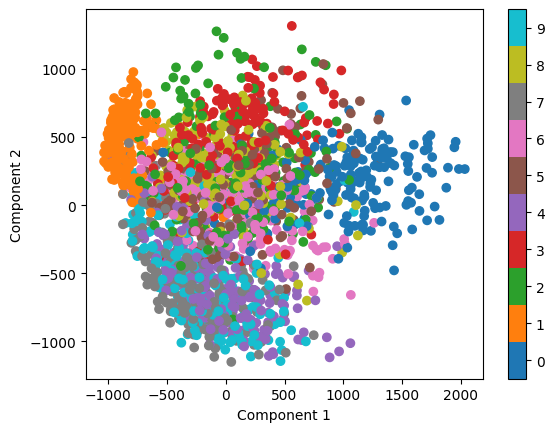

In [27]:
# Take only the first 2000 samples with the corresponding labels
X, labels = X_all[:2000, :], labels_all[:2000]

# Perform PCA
scores = pca_model.transform(X)

# Plot the data and reconstruction
visualize_components(scores[:, 0], scores[:, 1], labels)

(Hay otras técnicas como t-SNE para cuando PCA no sea suficiente, depende del tipo de datos al que nos enfrentemos).